In [36]:
# Import the random module.
import random
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [37]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 



In [38]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)



In [39]:
from citipy import citipy

In [40]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


624

In [41]:
# Import the requests library.
import requests
from datetime import datetime

In [42]:
# Import the API key.
from config import weather_api_key


In [43]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [44]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bowen
Processing Record 2 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 3 of Set 1 | arys
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | constitucion
Processing Record 6 of Set 1 | magistralnyy
Processing Record 7 of Set 1 | kismayo
City not found. Skipping...
Processing Record 8 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 9 of Set 1 | nhulunbuy
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | vila velha
Processing Record 12 of Set 1 | galesong
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | soyo
Processing Record 18 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 19 of Set 1 | havoysund
Processing Record 20 of Set 1 | nizhneyansk
City not found. Sk

Processing Record 37 of Set 4 | morehead
Processing Record 38 of Set 4 | yellowknife
Processing Record 39 of Set 4 | rexburg
Processing Record 40 of Set 4 | kinsale
Processing Record 41 of Set 4 | lillooet
Processing Record 42 of Set 4 | namibe
Processing Record 43 of Set 4 | maamba
Processing Record 44 of Set 4 | sola
Processing Record 45 of Set 4 | saint paul
Processing Record 46 of Set 4 | cacequi
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | edd
Processing Record 49 of Set 4 | sibolga
Processing Record 50 of Set 4 | shadrinsk
Processing Record 1 of Set 5 | lata
Processing Record 2 of Set 5 | lasa
Processing Record 3 of Set 5 | mackenzie
Processing Record 4 of Set 5 | juneau
Processing Record 5 of Set 5 | iqaluit
Processing Record 6 of Set 5 | saint george
Processing Record 7 of Set 5 | mehamn
Processing Record 8 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 5 | norman wells
Processing Record 10 of Set 5 | ullapool
Process

Processing Record 26 of Set 8 | narasannapeta
Processing Record 27 of Set 8 | koboldo
City not found. Skipping...
Processing Record 28 of Set 8 | fomboni
Processing Record 29 of Set 8 | saleaula
City not found. Skipping...
Processing Record 30 of Set 8 | krasnyy chikoy
Processing Record 31 of Set 8 | morant bay
Processing Record 32 of Set 8 | acapulco
Processing Record 33 of Set 8 | mantua
Processing Record 34 of Set 8 | muragachha
City not found. Skipping...
Processing Record 35 of Set 8 | svetlaya
Processing Record 36 of Set 8 | bolshegrivskoye
City not found. Skipping...
Processing Record 37 of Set 8 | atagay
Processing Record 38 of Set 8 | leshukonskoye
Processing Record 39 of Set 8 | altay
Processing Record 40 of Set 8 | storm lake
Processing Record 41 of Set 8 | pontianak
Processing Record 42 of Set 8 | jonkoping
Processing Record 43 of Set 8 | skjervoy
Processing Record 44 of Set 8 | mocambique
City not found. Skipping...
Processing Record 45 of Set 8 | pundaguitan
Processing Re

Processing Record 8 of Set 12 | klaksvik
Processing Record 9 of Set 12 | manjacaze
Processing Record 10 of Set 12 | macusani
Processing Record 11 of Set 12 | atar
Processing Record 12 of Set 12 | henties bay
Processing Record 13 of Set 12 | sechura
Processing Record 14 of Set 12 | gizo
Processing Record 15 of Set 12 | talcahuano
Processing Record 16 of Set 12 | korla
City not found. Skipping...
Processing Record 17 of Set 12 | tiarei
Processing Record 18 of Set 12 | houma
Processing Record 19 of Set 12 | sioux lookout
Processing Record 20 of Set 12 | roma
Processing Record 21 of Set 12 | kamenka
Processing Record 22 of Set 12 | jaciara
Processing Record 23 of Set 12 | ruteng
Processing Record 24 of Set 12 | sydney mines
Processing Record 25 of Set 12 | sorland
Processing Record 26 of Set 12 | makaha
Processing Record 27 of Set 12 | curaca
Processing Record 28 of Set 12 | caravelas
Processing Record 29 of Set 12 | almenara
Processing Record 30 of Set 12 | waddan
Processing Record 31 of 

In [45]:
len(city_data)


558

In [46]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bowen,-20.01,148.25,86.00,51,100,14.99,AU,2020-01-04 05:13:34
1,Arys,42.43,68.80,37.40,100,90,4.47,KZ,2020-01-04 05:13:34
2,Hermanus,-34.42,19.24,69.01,84,0,5.01,ZA,2020-01-04 05:13:34
3,Constitucion,23.99,-104.67,41.00,61,0,3.85,MX,2020-01-04 05:13:34
4,Magistralnyy,56.17,107.45,23.76,87,100,6.15,RU,2020-01-04 05:13:35
5,Nhulunbuy,-12.18,136.78,93.20,46,96,10.29,AU,2020-01-04 05:13:35
6,Ushuaia,-54.81,-68.31,48.20,66,75,9.17,AR,2020-01-04 05:10:52
7,Vila Velha,-3.71,-38.60,86.00,78,40,5.82,BR,2020-01-04 05:13:35
8,Galesong,-5.32,119.37,86.00,79,20,10.29,ID,2020-01-04 05:13:36
9,Hithadhoo,-0.60,73.08,83.10,68,30,3.76,MV,2020-01-04 05:11:28


In [47]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]


In [48]:
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bowen,AU,2020-01-04 05:13:34,-20.01,148.25,86.00,51,100,14.99
1,Arys,KZ,2020-01-04 05:13:34,42.43,68.80,37.40,100,90,4.47
2,Hermanus,ZA,2020-01-04 05:13:34,-34.42,19.24,69.01,84,0,5.01
3,Constitucion,MX,2020-01-04 05:13:34,23.99,-104.67,41.00,61,0,3.85
4,Magistralnyy,RU,2020-01-04 05:13:35,56.17,107.45,23.76,87,100,6.15
5,Nhulunbuy,AU,2020-01-04 05:13:35,-12.18,136.78,93.20,46,96,10.29
6,Ushuaia,AR,2020-01-04 05:10:52,-54.81,-68.31,48.20,66,75,9.17
7,Vila Velha,BR,2020-01-04 05:13:35,-3.71,-38.60,86.00,78,40,5.82
8,Galesong,ID,2020-01-04 05:13:36,-5.32,119.37,86.00,79,20,10.29
9,Hithadhoo,MV,2020-01-04 05:11:28,-0.60,73.08,83.10,68,30,3.76


In [49]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [50]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [51]:
import time

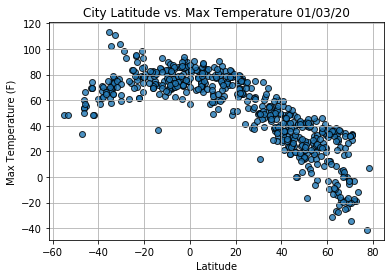

In [52]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


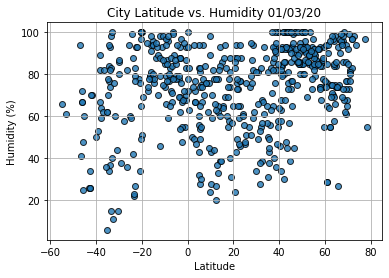

In [53]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


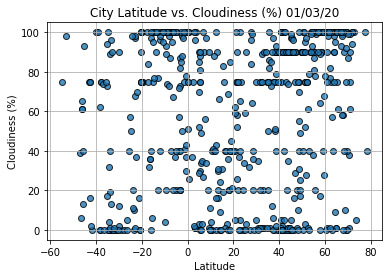

In [54]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


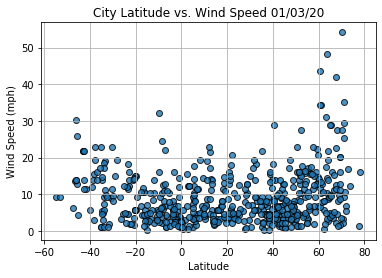

In [55]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [56]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [57]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [58]:
# Creating a dataframe for northern and southern hemisphere
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [59]:
northern_hemi_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Arys,KZ,2020-01-04 05:13:34,42.43,68.80,37.40,100,90,4.47
3,Constitucion,MX,2020-01-04 05:13:34,23.99,-104.67,41.00,61,0,3.85
4,Magistralnyy,RU,2020-01-04 05:13:35,56.17,107.45,23.76,87,100,6.15
10,Nikolskoye,RU,2020-01-04 05:11:32,59.70,30.79,33.01,74,68,6.71
12,Saint-Philippe,CA,2020-01-04 05:11:27,45.36,-73.48,39.20,93,90,3.87


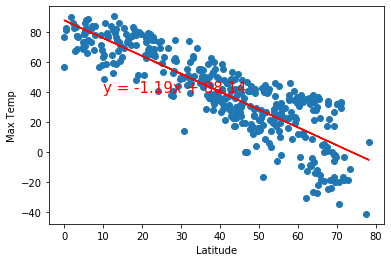

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))



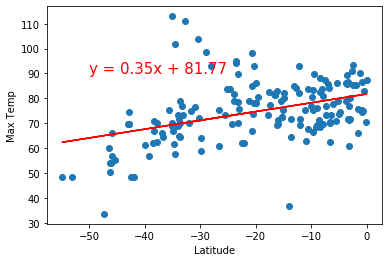

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


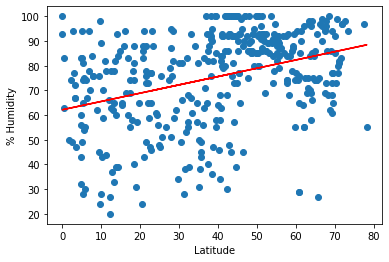

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


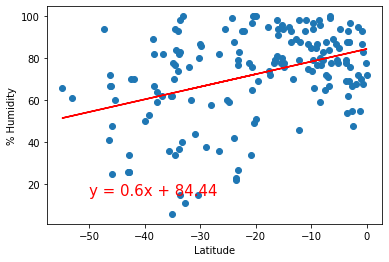

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

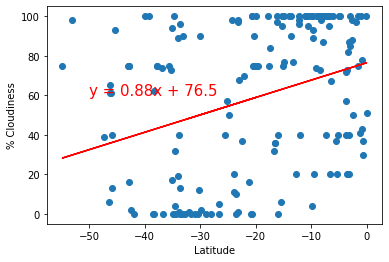

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

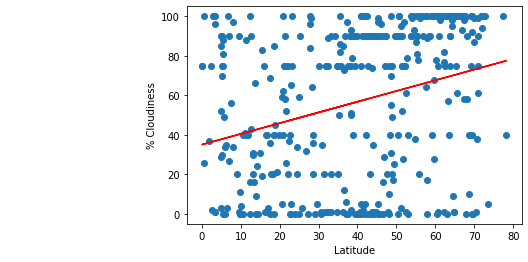

In [65]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Norththern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


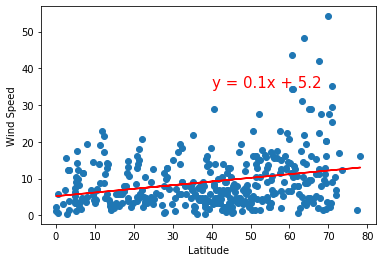

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


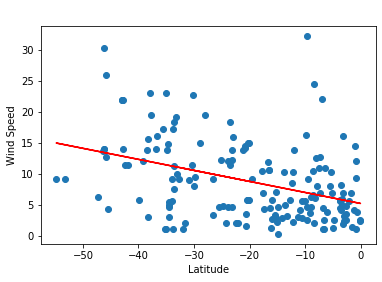

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
